In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from IPython.display import clear_output, Image, display, HTML
import keras.utils as image
import coremltools
from keras.models import load_model
import coremltools as ct

#### Loading all models

In [2]:
path = 'Saved models'
general_model = models.load_model(path+'/groceries_base_model.h5')  
model_packages = models.load_model(path+'/packages_vgg19.h5')
model_vegetables = models.load_model(path+'/veg_mobilenet.h5')
model_fruits = models.load_model(path+'/fruits_xception.h5')

#### Classes lists

In [3]:
pack_list= ['Alpro-Blueberry-Soyghurt', 'Alpro-Fresh-Soy-Milk', 'Alpro-Shelf-Soy-Milk', 'Alpro-Vanilla-Soyghurt', 
            'Arla-Ecological-Medium-Fat-Milk', 'Arla-Ecological-Sour-Cream', 'Arla-Lactose-Medium-Fat-Milk', 
            'Arla-Medium-Fat-Milk', 'Arla-Mild-Vanilla-Yoghurt', 'Arla-Natural-Mild-Low-Fat-Yoghurt', 
            'Arla-Natural-Yoghurt', 'Arla-Sour-Cream', 'Arla-Sour-Milk', 'Arla-Standard-Milk', 'Bravo-Apple-Juice', 
            'Bravo-Orange-Juice', 'Garant-Ecological-Medium-Fat-Milk', 'Garant-Ecological-Standard-Milk', 
            'God-Morgon-Apple-Juice', 'God-Morgon-Orange-Juice', 'God-Morgon-Orange-Red-Grapefruit-Juice', 
            'God-Morgon-Red-Grapefruit-Juice', 'Oatly-Natural-Oatghurt', 'Oatly-Oat-Milk', 'Tropicana-Apple-Juice', 
            'Tropicana-Golden-Grapefruit', 'Tropicana-Juice-Smooth', 'Tropicana-Mandarin-Morning', 
            'Valio-Vanilla-Yoghurt', 'Yoggi-Strawberry-Yoghurt', 'Yoggi-Vanilla-Yoghurt']

veg_list= ['Asparagus', 'Aubergine', 'Beef-Tomato', 'Brown-Cap-Mushroom', 'Cabbage', 'Carrots', 'Cucumber', 
           'Floury-Potato', 'Garlic', 'Ginger', 'Green-Bell-Pepper', 'Leek', 'Orange-Bell-Pepper', 'Red-Beet', 
           'Red-Bell-Pepper', 'Regular-Tomato', 'Solid-Potato', 'Sweet-Potato', 'Vine-Tomato', 'Yellow-Bell-Pepper', 
           'Yellow-Onion', 'Zucchini']

fruits_list= ['Anjou', 'Avocado', 'Banana', 'Cantaloupe', 'Conference', 'Galia-Melon', 'Golden-Delicious', 
              'Granny-Smith', 'Honeydew-Melon', 'Kaiser', 'Kiwi', 'Lemon', 'Lime', 'Mango', 'Nectarine', 'Orange', 
              'Papaya', 'Passion-Fruit', 'Peach', 'Pineapple', 'Pink-Lady', 'Plum', 'Pomegranate', 'Red-Delicious', 
              'Red-Grapefruit', 'Royal-Gala', 'Satsumas', 'Watermelon']

classes = ['Fruit', 'Packages', 'Vegetables']

#### Displaying output

1/1 [==============================] - 1s 1s/step
It's Fruit
1/1 [==============================] - 1s 1s/step
It's Banana


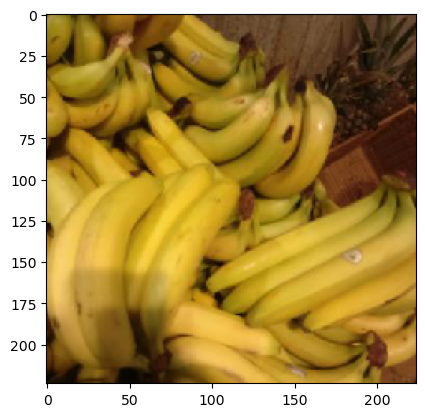

In [4]:
img_path = path+'/sample.jpg' 
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)

img_width, img_height = 224, 224

def predict(img_path):
    
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    
    img = np.vstack([x])
    pred_class = general_model.predict(img)
    pred_class_index = pred_class.argmax(axis=1)[0]
    base_class = classes[pred_class_index]
    print("It's "+ base_class)
    
    if base_class == 'Fruit':
        pred_class = model_fruits.predict(img)
        pred_class_index = pred_class.argmax(axis=1)[0]
        class_name= fruits_list[pred_class_index]
        print("It's "+ class_name)
        
            
    elif base_class == 'Packages':
        pred_class = model_packages.predict(img)
        pred_class_index = pred_class.argmax(axis=1)[0]
        class_name= pack_list[pred_class_index]
        print("It's "+ class_name)
        
        
    elif base_class == 'Vegetables':
        pred_class = model_vegetables.predict(img)
        pred_class_index = pred_class.argmax(axis=1)[0]
        class_name= veg_list[pred_class_index]
        print("It's "+ class_name)       
    
    return base_class, class_name

base_class, class_name = predict(img_path)

#### Convert  Keras models to Core ML format

In [ ]:
models = {
'general_model': general_model,
'model_packages': model_packages,
'model_vegetables': model_vegetables,
'model_fruits': model_fruits
}

converted_models = {}
for model_name, model in models.items():
    converted_model = ct.convert(model)
    converted_model.save(f'{model_name}.mlmodel')
    converted_models[model_name] = converted_model